In [6]:
import pandas as pd
import os
%matplotlib inline

In [7]:
data_path = "/mnt/d/work/data/agrivision/"
classes = os.listdir(f"{data_path}/train/labels")
seed = 42

In [8]:
full_df = pd.read_csv("/mnt/d/work/data/agrivision/train_val_initial_2020-03-25.csv")
invalid_df = pd.read_csv("/mnt/d/work/data/agrivision/checked_low_ious.csv") 

train_df = full_df[full_df["ds_part"] == 'train']
val_df = full_df[full_df["ds_part"] == 'val']

train_df = pd.merge(train_df, invalid_df, on='name', how='outer')
train_df['invalid'] = train_df['invalid'].fillna(False)
train_df = train_df[~train_df['invalid']]

In [9]:
classes.remove('background')

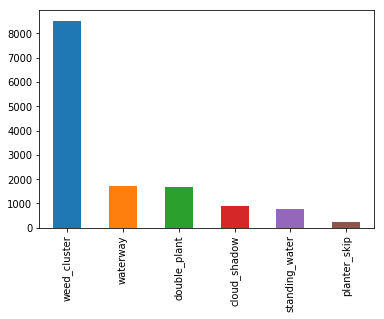

In [10]:
train_df[classes].astype(bool).sum().sort_values(ascending=False).plot.bar()

In [11]:
num_samples = train_df[classes].astype(bool).sum().sort_values(ascending=False)

In [12]:
num_samples

weed_cluster      8519
waterway          1706
double_plant      1668
cloud_shadow       904
standing_water     784
planter_skip       246
dtype: int64

In [13]:
amount_to_sample = num_samples.diff().cumsum().dropna().astype(int) * -1

In [14]:
amount_to_sample

waterway          6813
double_plant      6851
cloud_shadow      7615
standing_water    7735
planter_skip      8273
dtype: int64

In [15]:
sampled_items = []
for label, amount in amount_to_sample.items():
    sampled = train_df[train_df[label] > 0].sample(n=amount, replace=True)
    sampled_items.append(sampled)

sampled_items = pd.concat(sampled_items)
train_df = pd.concat([train_df, sampled_items])

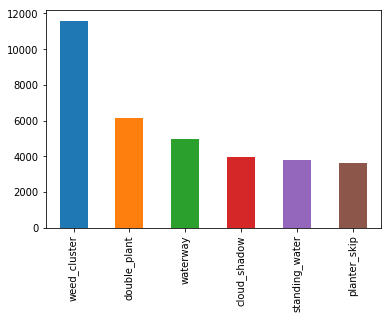

In [73]:
train_df[classes].astype(bool).sum().sort_values(ascending=False).plot.bar()

In [18]:
data_df = pd.concat([train_df, val_df])

/home/topkech/anaconda3/envs/agrivision/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
data_df

,boundary,cloud_shadow,combined_mask,double_plant,ds_part,end_x,end_y,field_id,id,incorrect,invalid,mask,name,planter_skip,questionable,standing_water,start_x,start_y,waterway,weed_cluster
0,262144,0.0,0,0.0,train,2826,4677,WJZJEE14I,WJZJEE14I_2314-4165-2826-4677,NaN,False,0,WJZJEE14I_2314-4165-2826-4677.jpg,0.0,NaN,0.0,2314,4165,0.0,174211.0
1,226182,0.0,0,0.0,train,1525,1342,XD6GQK3HF,XD6GQK3HF_1013-830-1525-1342,NaN,False,0,XD6GQK3HF_1013-830-1525-1342.jpg,0.0,NaN,0.0,1013,830,0.0,35362.0
2,166559,0.0,0,0.0,train,2050,3744,91MB8NI61,91MB8NI61_1538-3232-2050-3744,False,False,0,91MB8NI61_1538-3232-2050-3744.jpg,0.0,False,0.0,1538,3232,0.0,2524.0
3,262144,0.0,0,0.0,train,8904,7918,VLABVAH3T,VLABVAH3T_8392-7406-8904-7918,NaN,False,0,VLABVAH3T_8392-7406-8904-7918.jpg,0.0,NaN,0.0,8392,7406,38693.0,0.0
4,223071,205743.0,0,0.0,train,2877,4136,393VYUQ83,393VYUQ83_2365-3624-2877-4136,NaN,False,0,393VYUQ83_2365-3624-2877-4136.jpg,0.0,NaN,0.0,2365,3624,0.0,0.0
5,262144,0.0,0,22708.0,train,9602,1344,T89JYE12U,T89JYE12U_9090-832-9602-1344,NaN,False,0,T89JYE12U_9090-832-9602-1344.jpg,0.0,NaN,0.0,9090,832,0.0,24851.0
6,141389,0.0,0,0.0,train,9400,1073,24M49T6CC,24M49T6CC_8888-561-9400-1073,NaN,False,0,24M49T6CC_8888-561-9400-1073.jpg,0.0,NaN,0.0,8888,561,0.0,5726.0
7,204888,0.0,0,0.0,train,1266,2831,J4IXXECHN,J4IXXECHN_754-2319-1266-2831,NaN,False,0,J4IXXECHN_754-2319-1266-2831.jpg,0.0,NaN,0.0,754,2319,0.0,9081.0
8,212736,0.0,0,0.0,train,2875,2677,KVQI28WTL,KVQI28WTL_2363-2165-2875-2677,NaN,False,0,KVQI28WTL_2363-2165-2875-2677.jpg,0.0,NaN,0.0,2363,2165,0.0,84193.0
9,262144,0.0,0,0.0,train,2244,6310,F2JPFEHLL,F2JPFEHLL_1732-5798-2244-6310,NaN,False,0,F2JPFEHLL_1732-5798-2244-6310.jpg,0.0,NaN,0.0,1732,5798,0.0,28810.0


In [20]:
data_df.to_csv('data_dumb_oversample.csv')